📌 데이터 크기: (2400000, 49)

📌 데이터 타입 및 결측치:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 49 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                object 
 1   ID                  object 
 2   증감율_이용건수_신용_전월      float64
 3   증감율_이용건수_신판_전월      float64
 4   증감율_이용건수_일시불_전월     float64
 5   증감율_이용건수_할부_전월      float64
 6   증감율_이용건수_CA_전월      float64
 7   증감율_이용건수_체크_전월      float64
 8   증감율_이용건수_카드론_전월     float64
 9   증감율_이용금액_신용_전월      float64
 10  증감율_이용금액_신판_전월      float64
 11  증감율_이용금액_일시불_전월     float64
 12  증감율_이용금액_할부_전월      float64
 13  증감율_이용금액_CA_전월      float64
 14  증감율_이용금액_체크_전월      float64
 15  증감율_이용금액_카드론_전월     float64
 16  증감율_이용건수_신용_분기      float64
 17  증감율_이용건수_신판_분기      float64
 18  증감율_이용건수_일시불_분기     float64
 19  증감율_이용건수_할부_분기      float64
 20  증감율_이용건수_CA_분기      float64
 21  증감율_이용건수_체크_분기      float64
 22  증감율_이용건수_카드론_분기     float64
 23  증감율_이용금액_신용_분기  

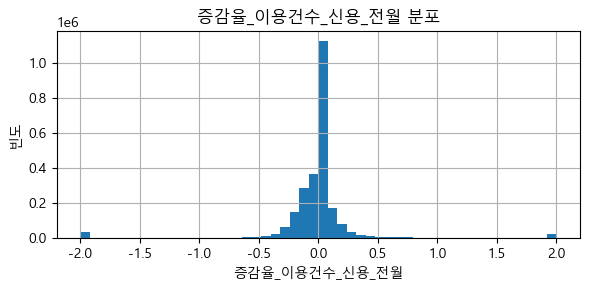

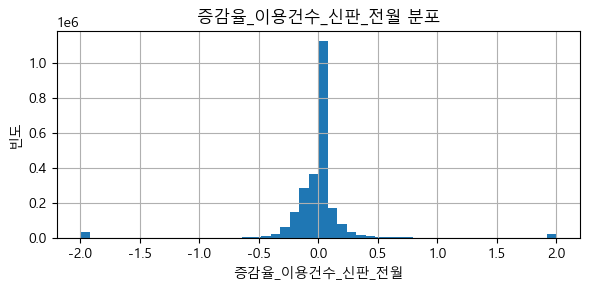

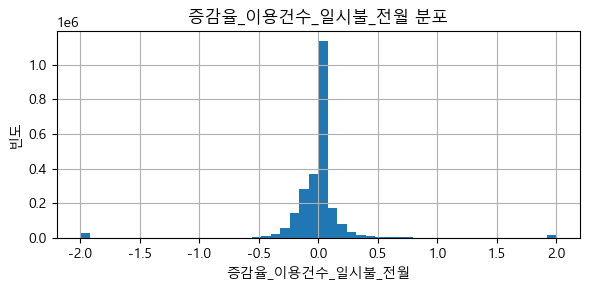

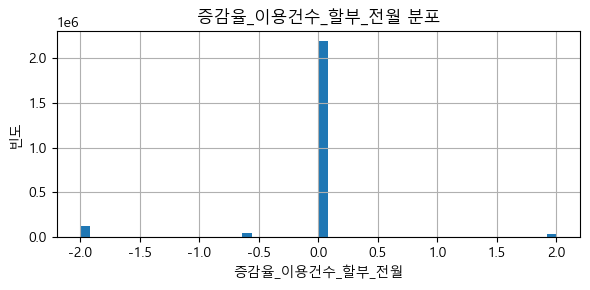

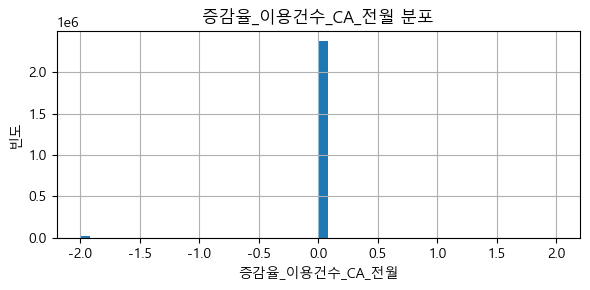

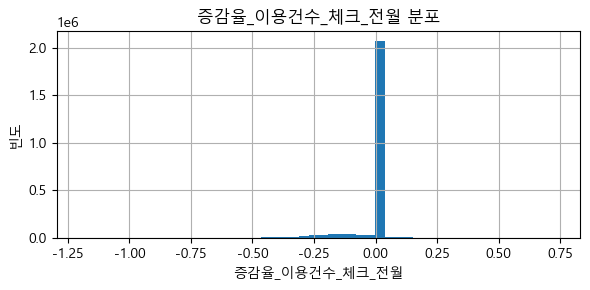

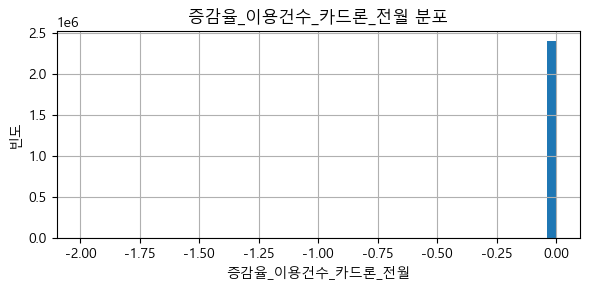

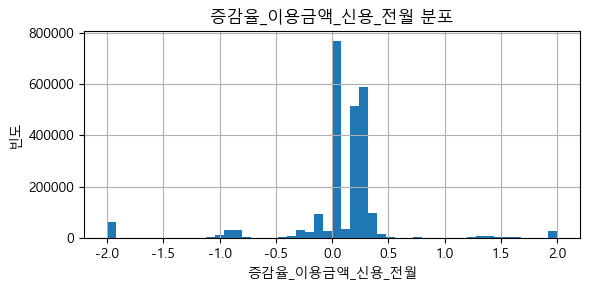

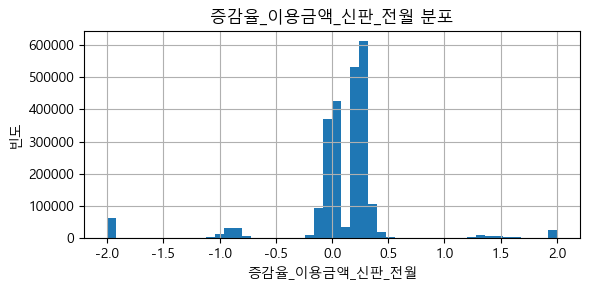

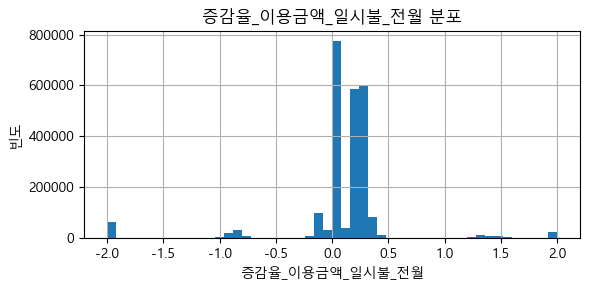

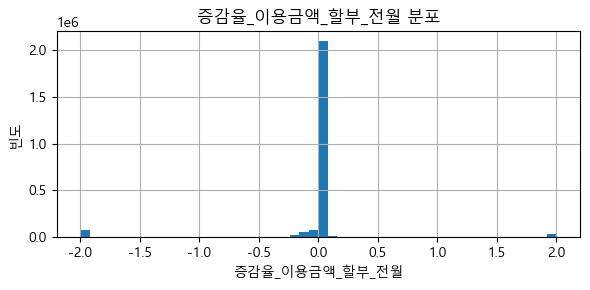

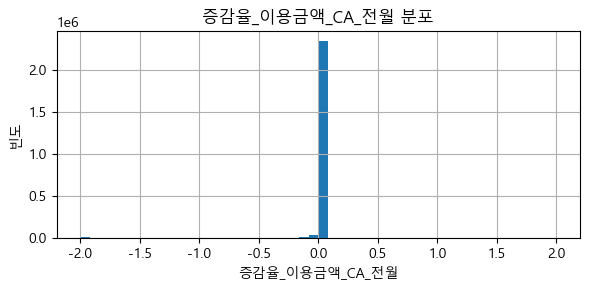

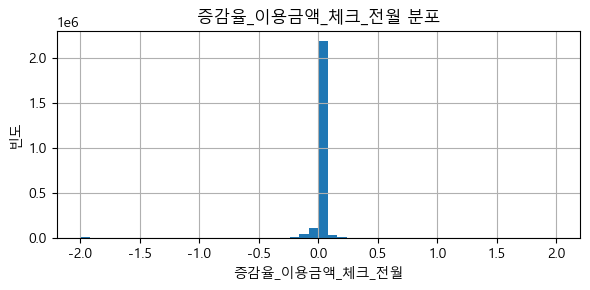

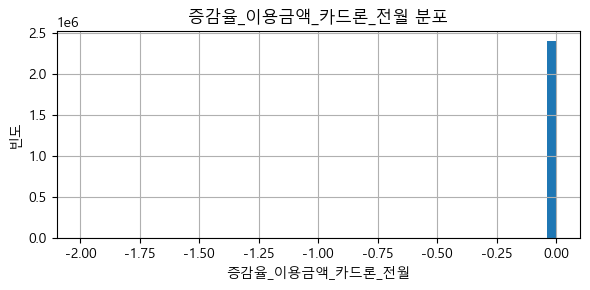

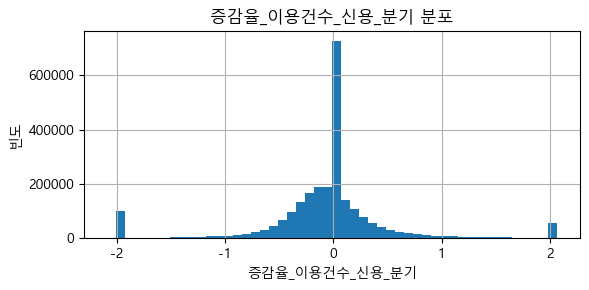

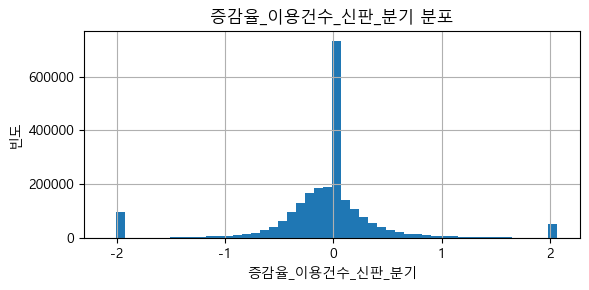

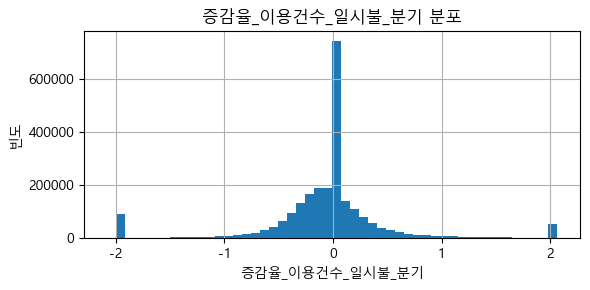

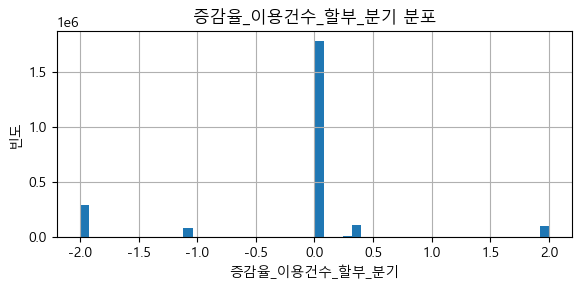

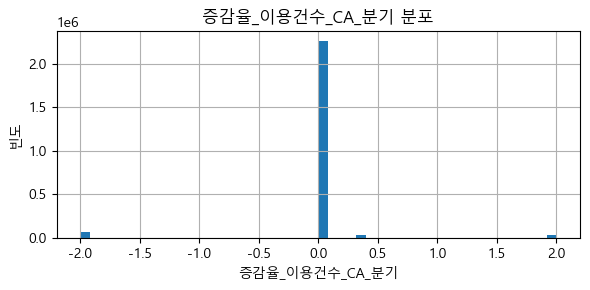

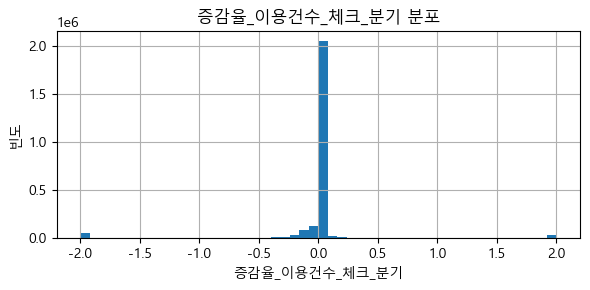

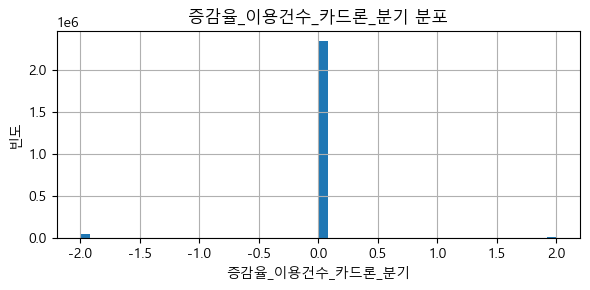

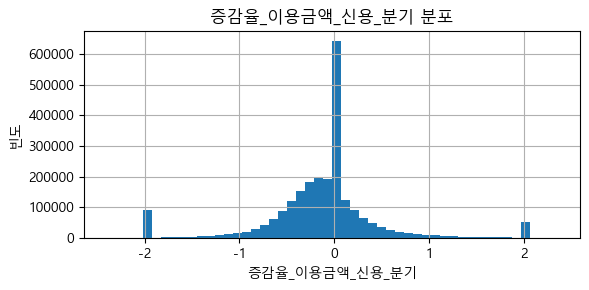

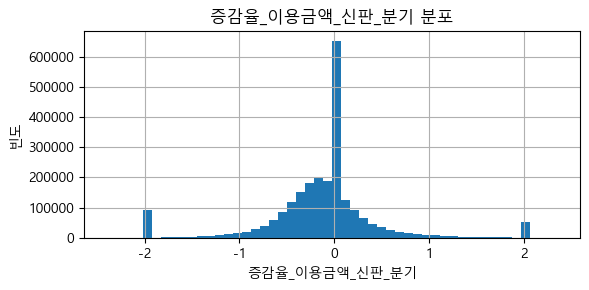

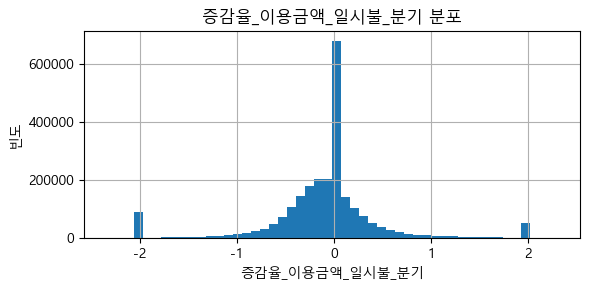

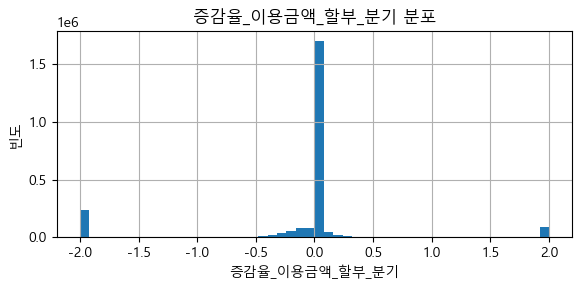

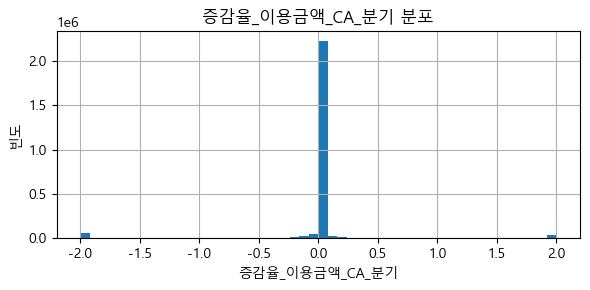

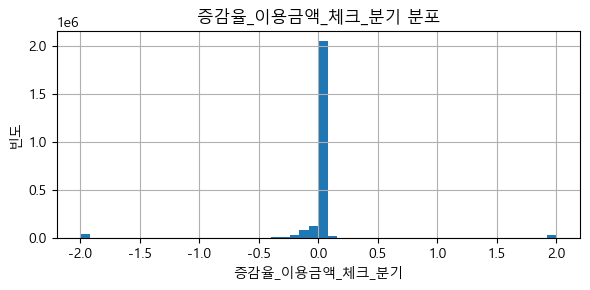

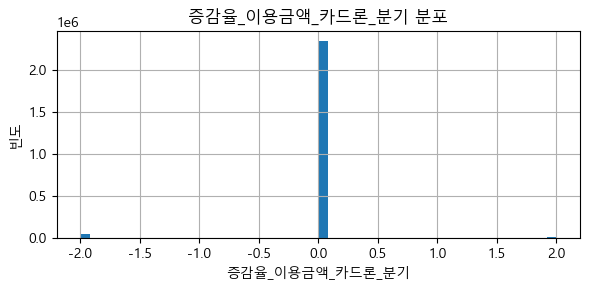

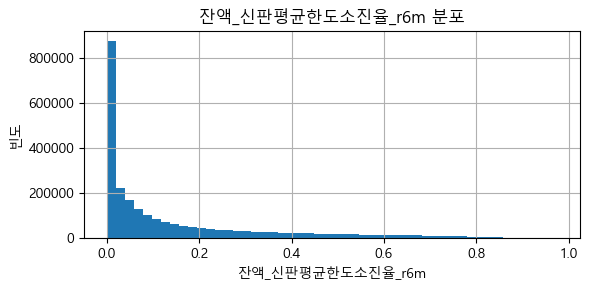

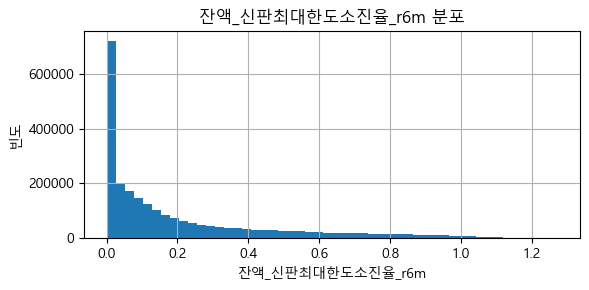

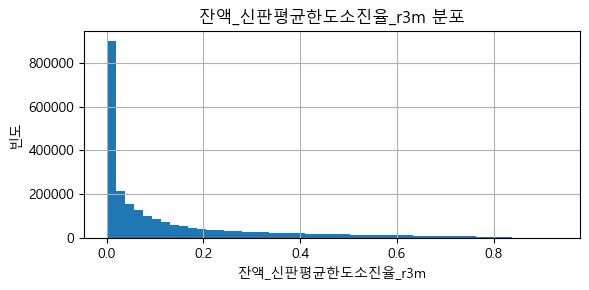

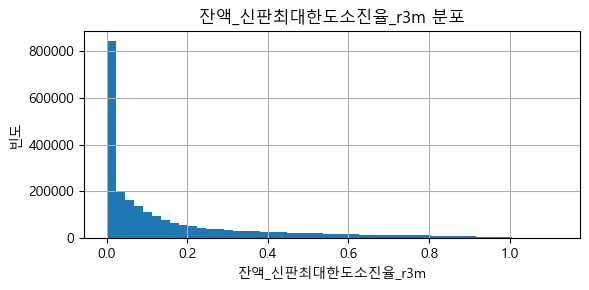

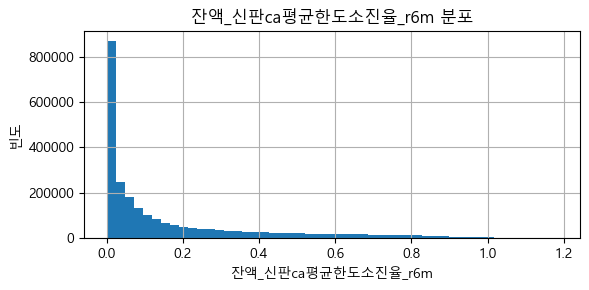

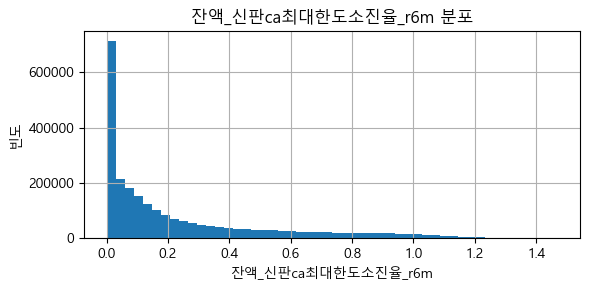

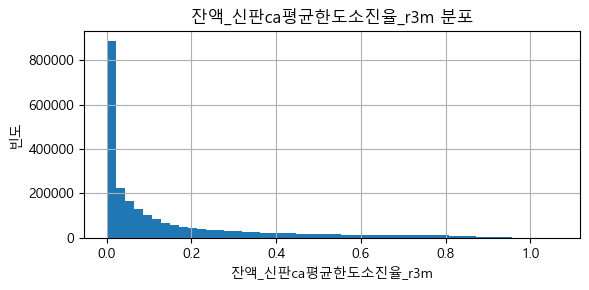

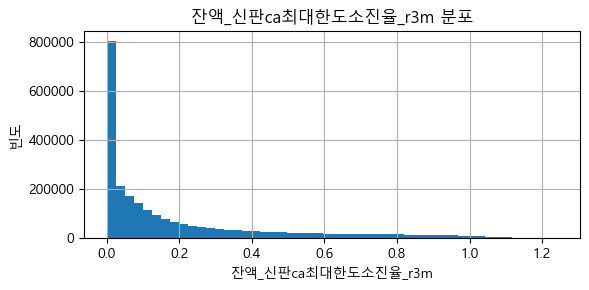

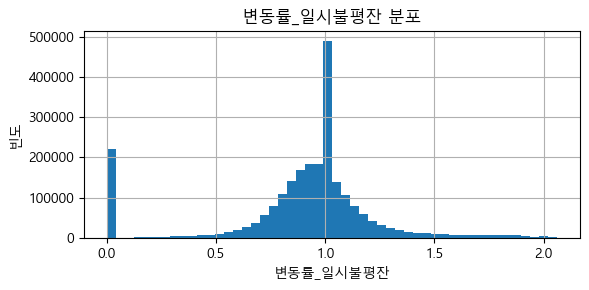

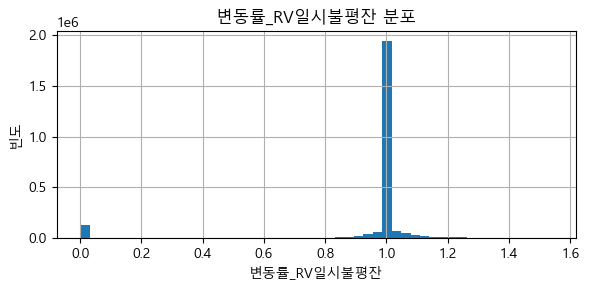

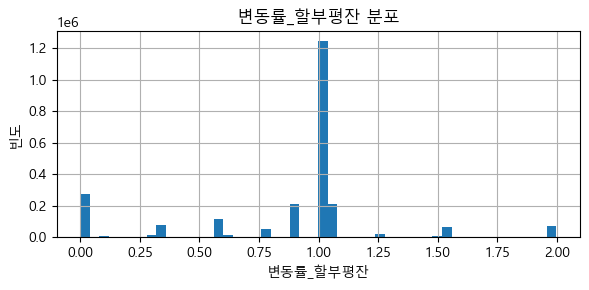

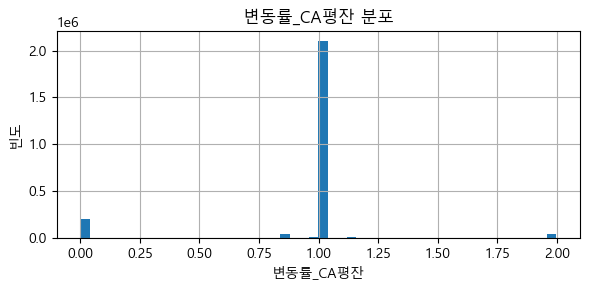

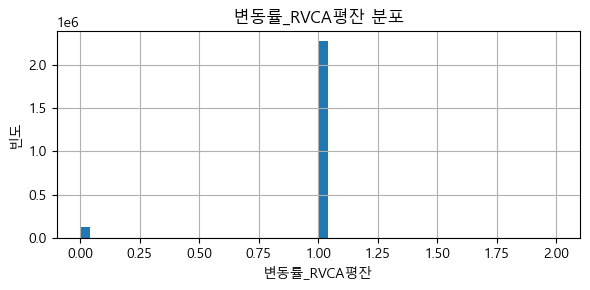

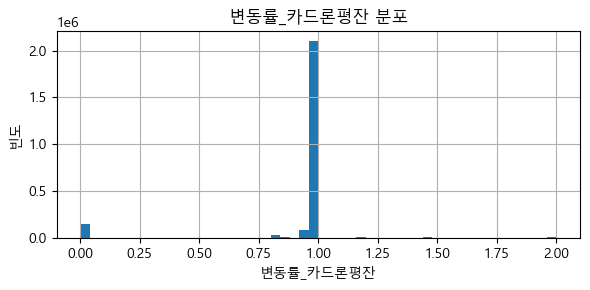

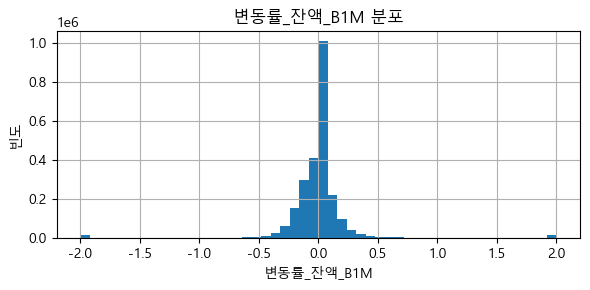

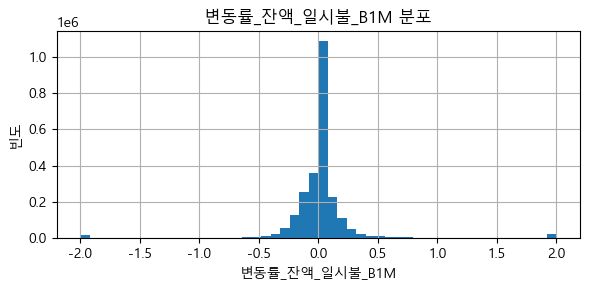

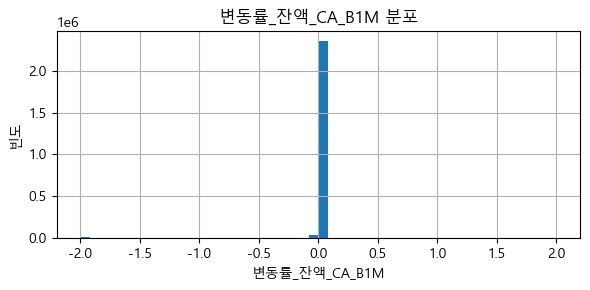

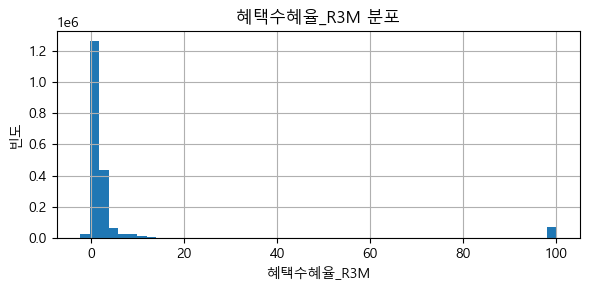

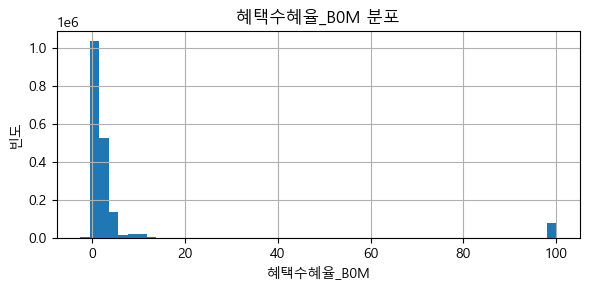

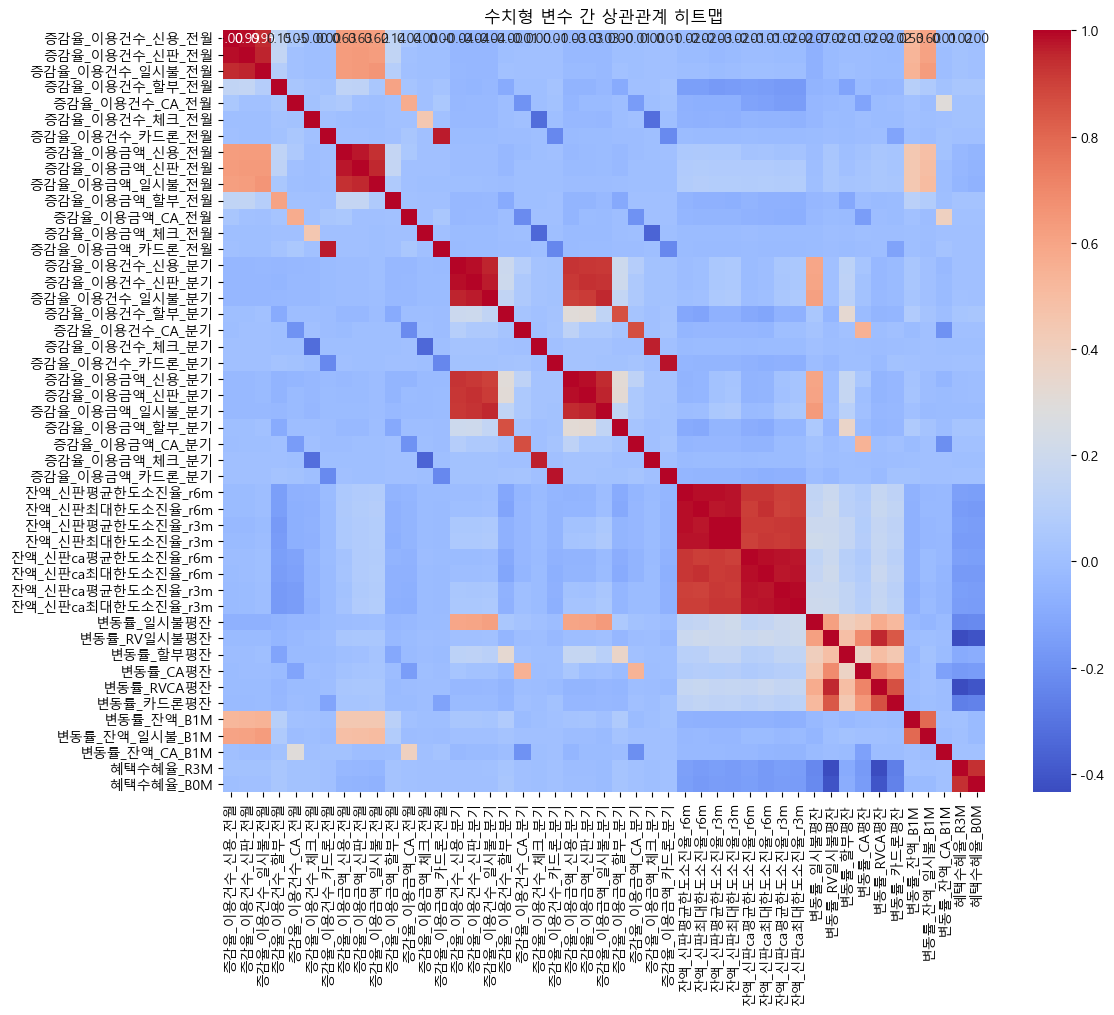

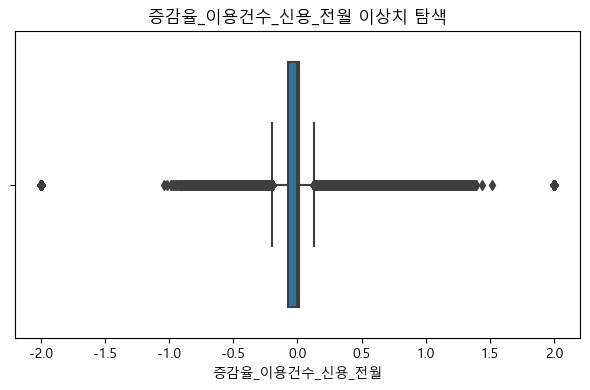

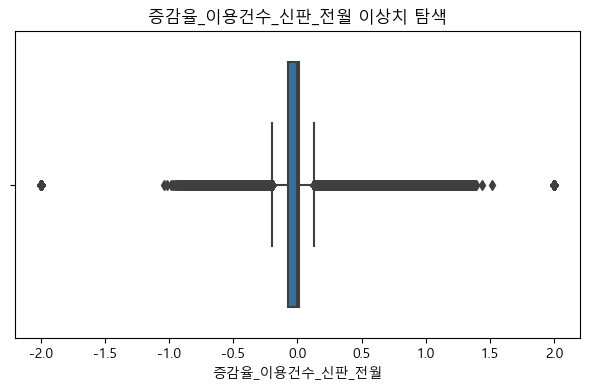

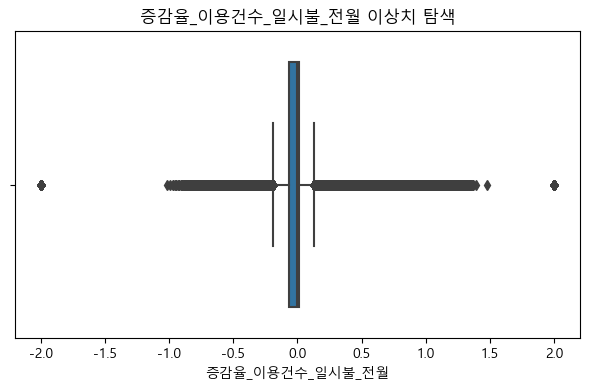

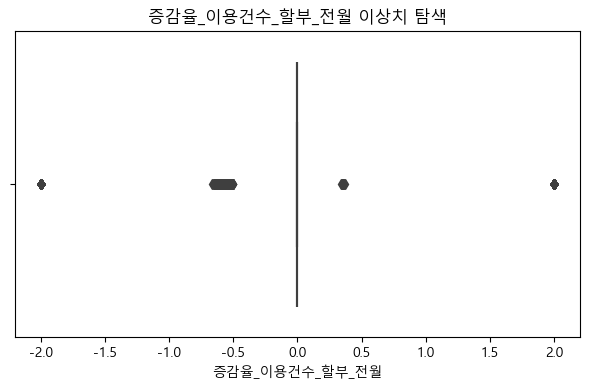

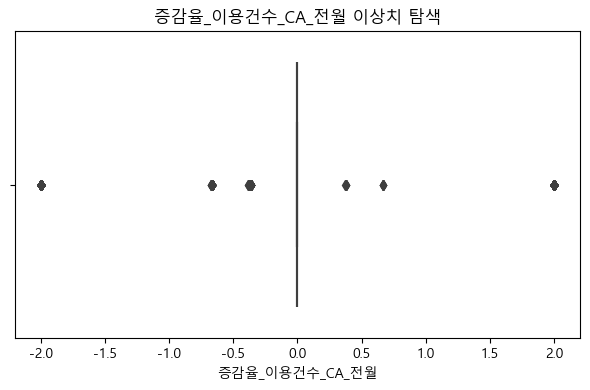

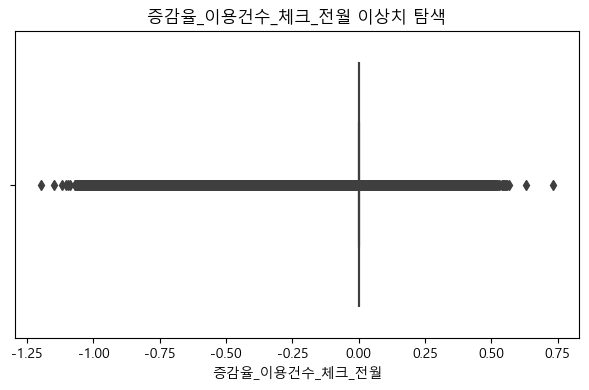

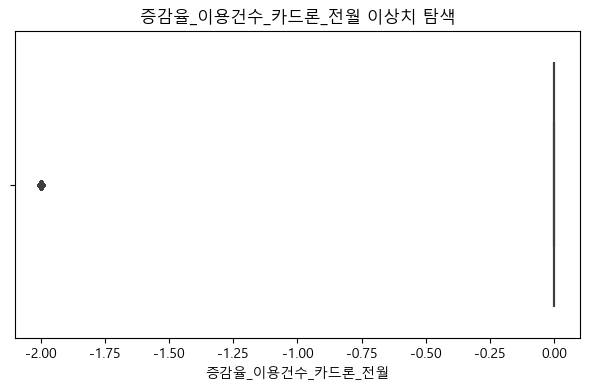

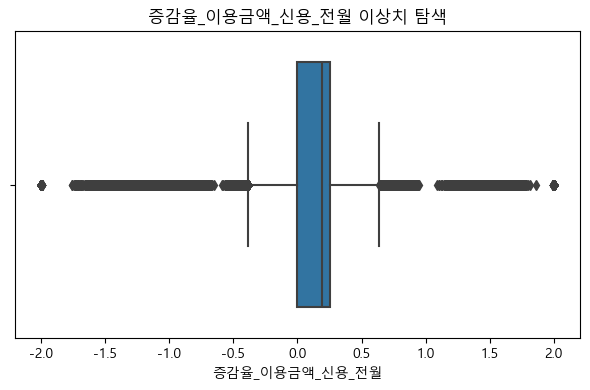

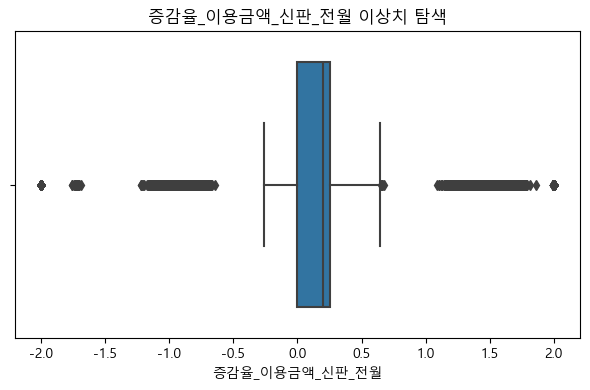

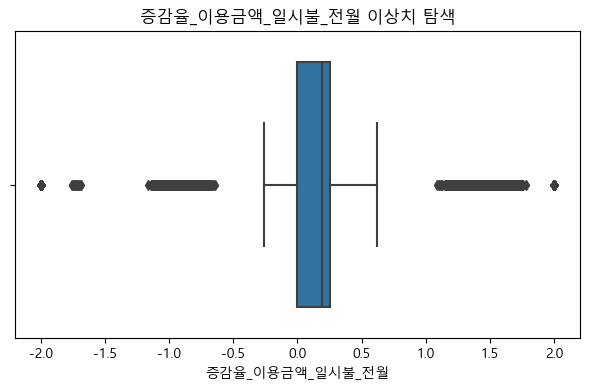

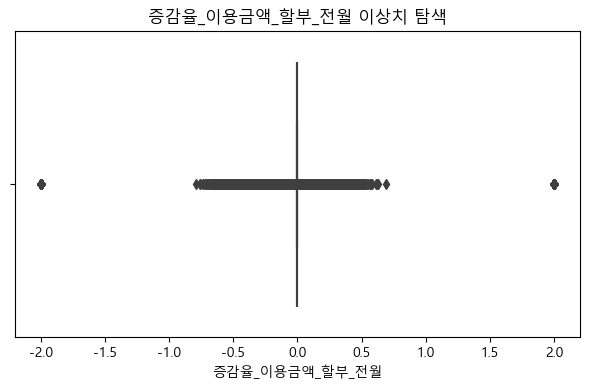

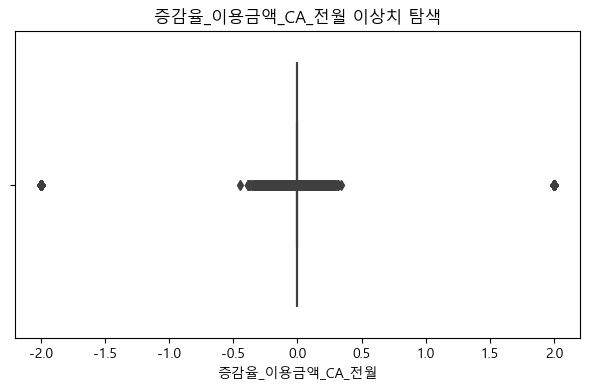

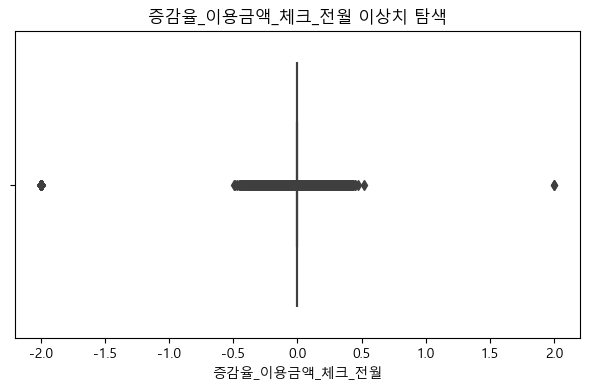

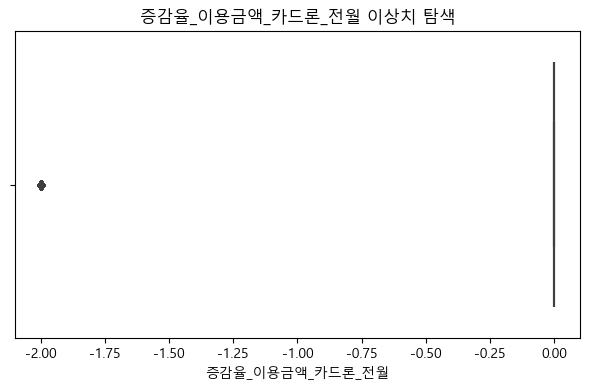

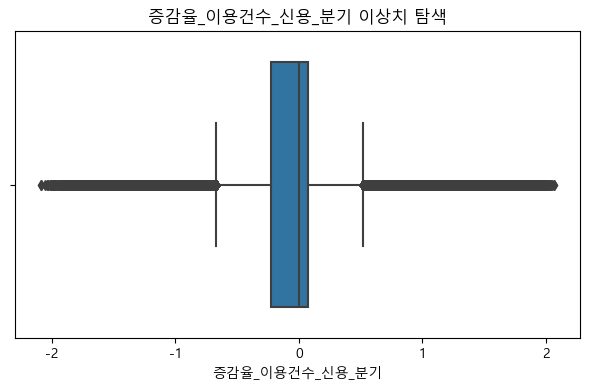

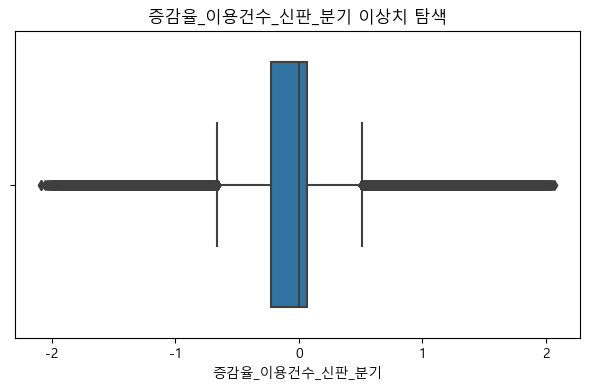

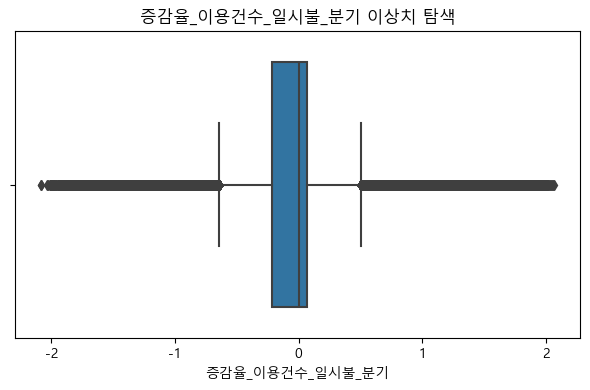

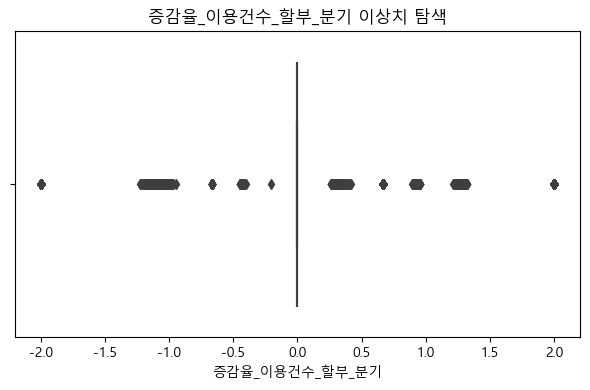

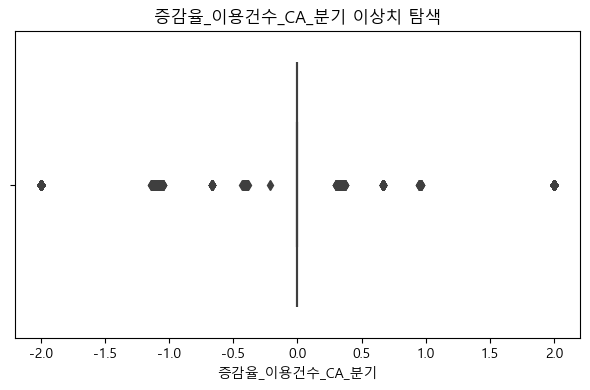

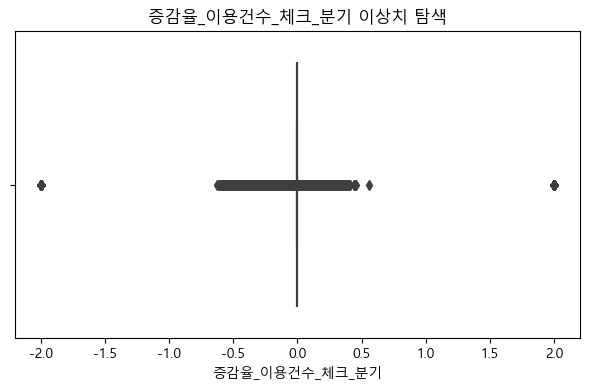

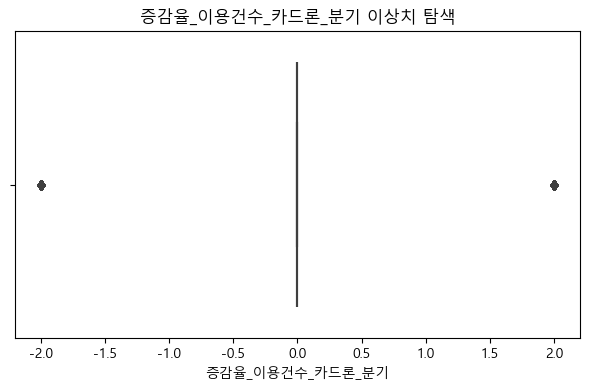

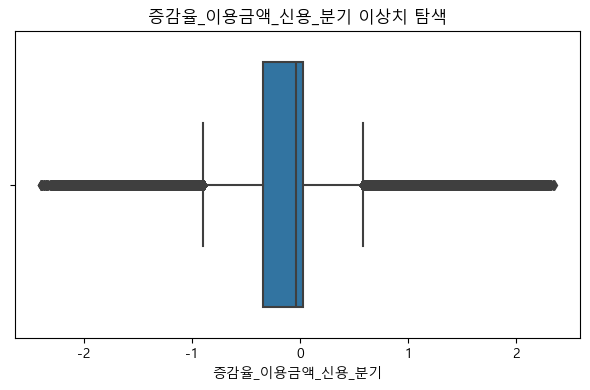

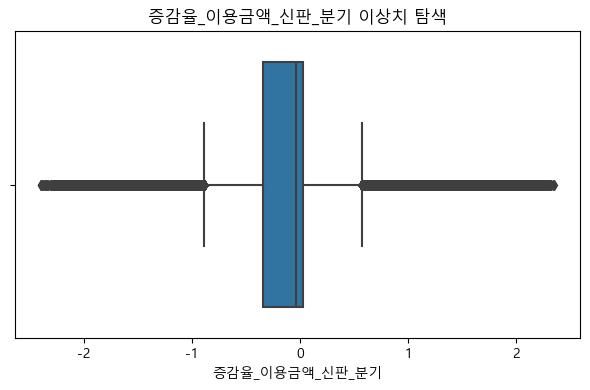

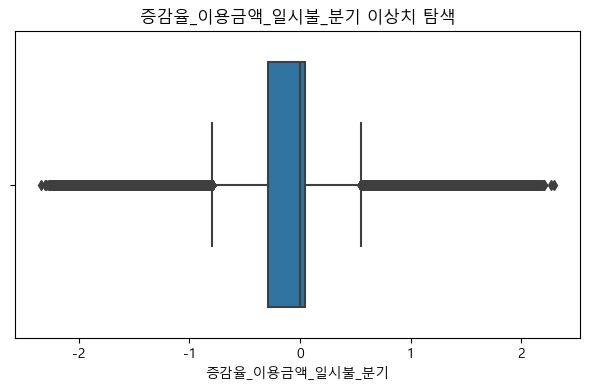

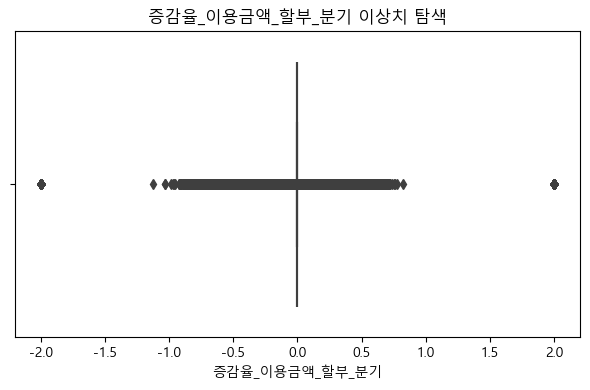

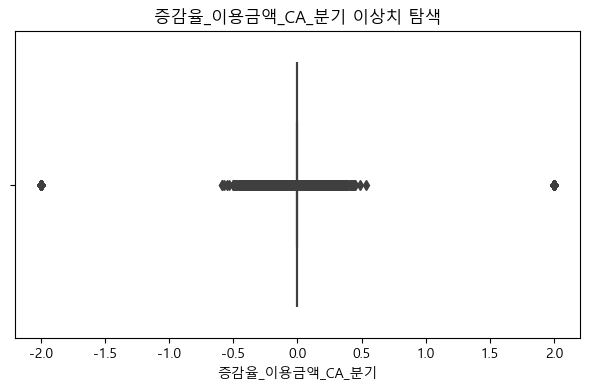

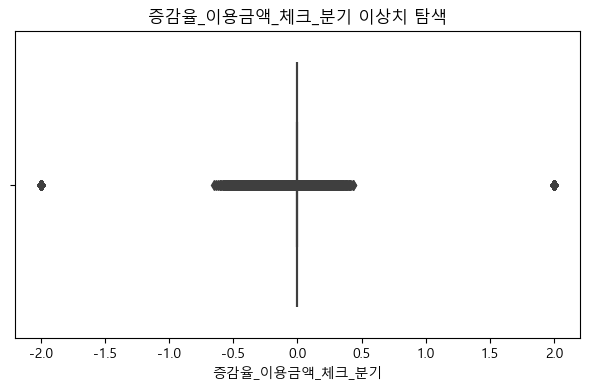

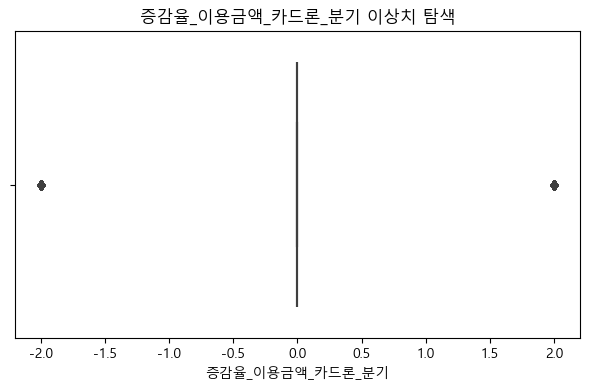

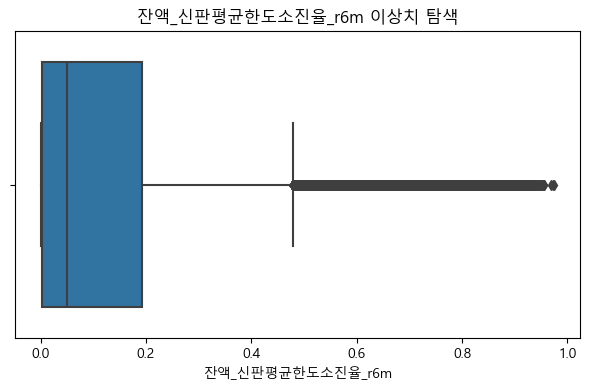

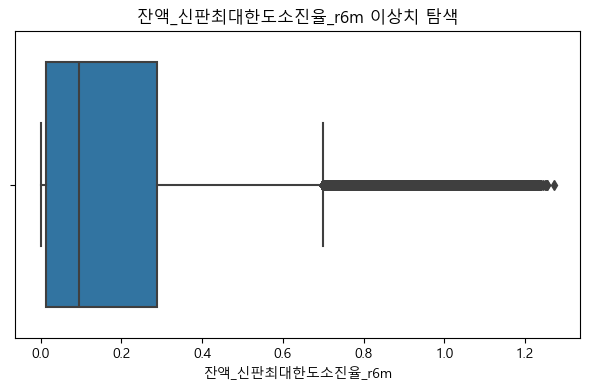

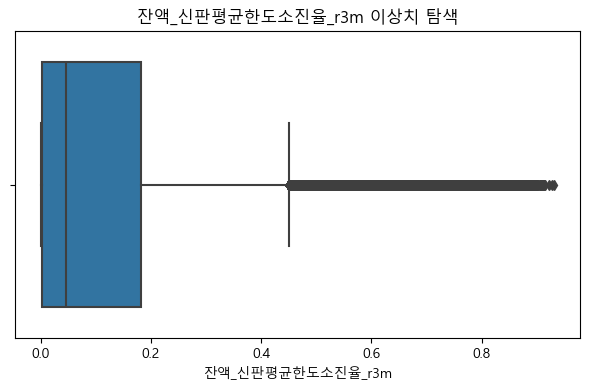

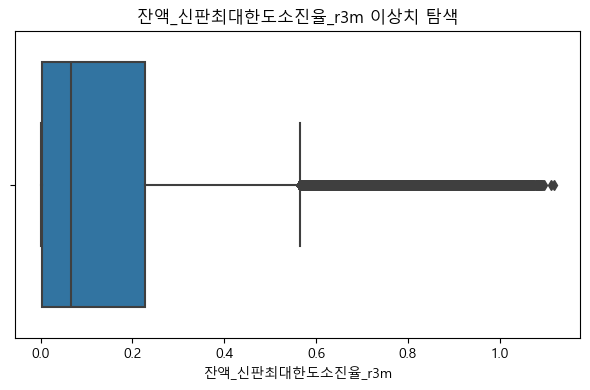

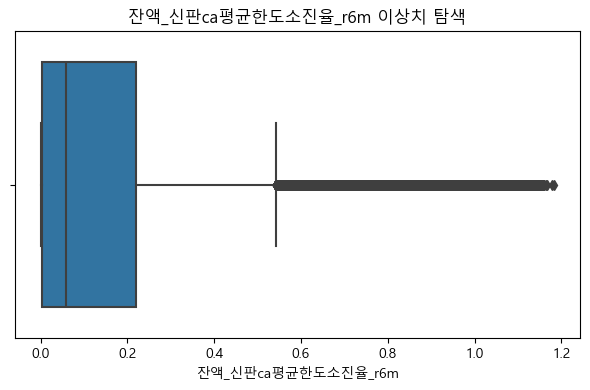

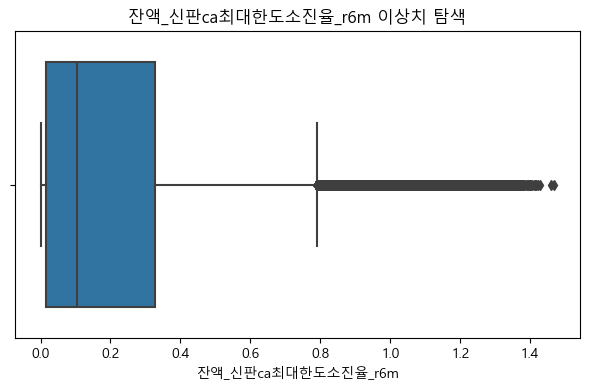

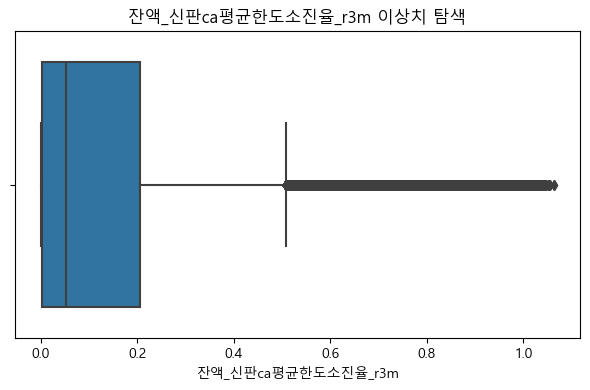

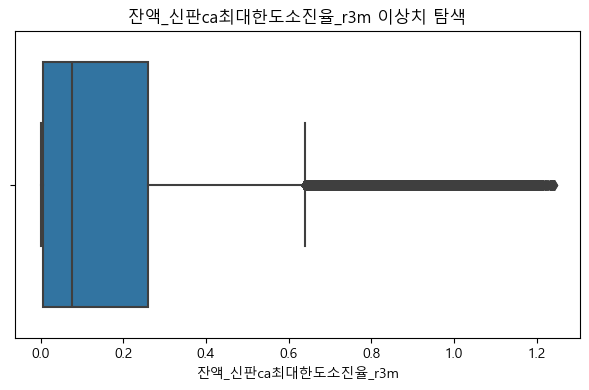

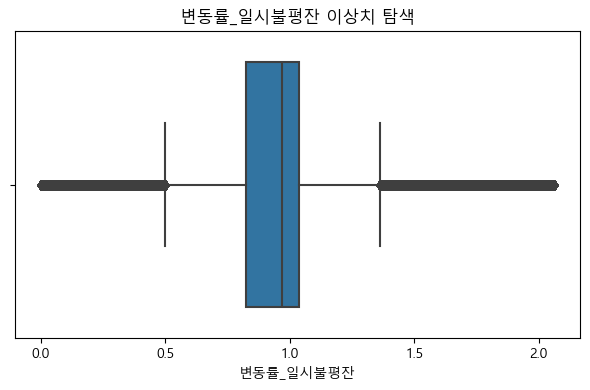

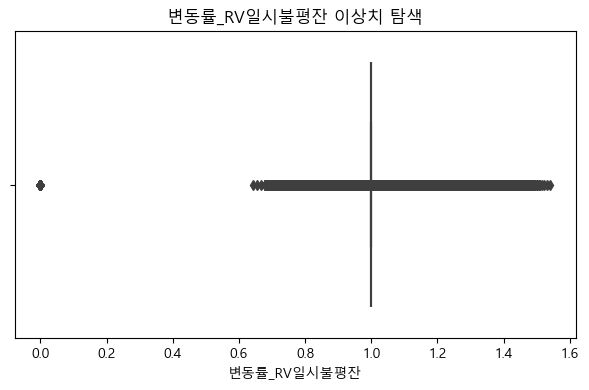

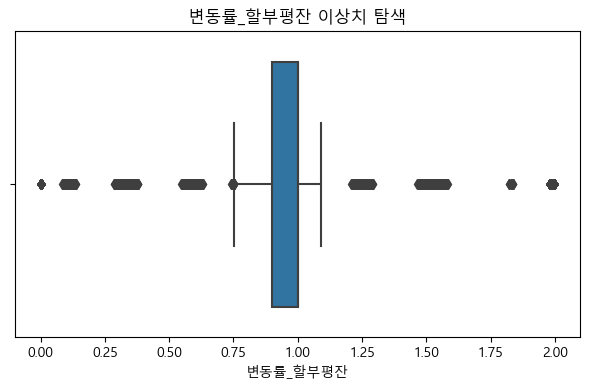

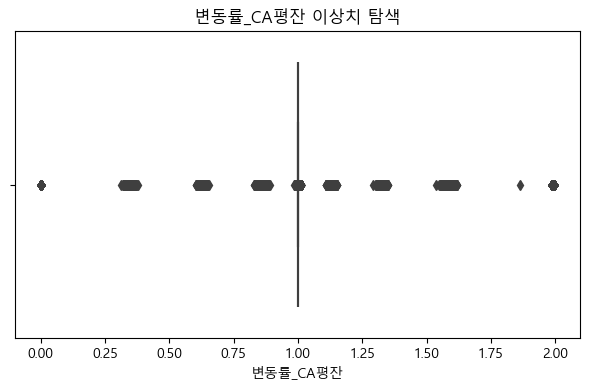

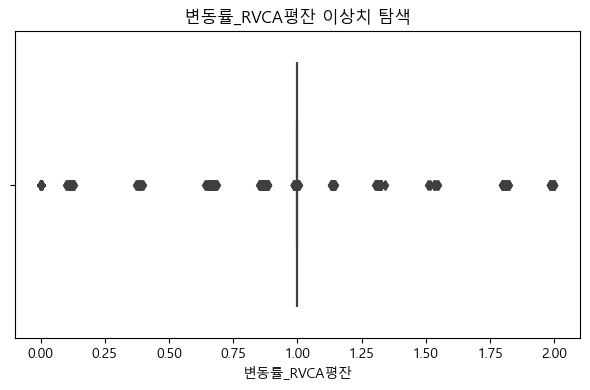

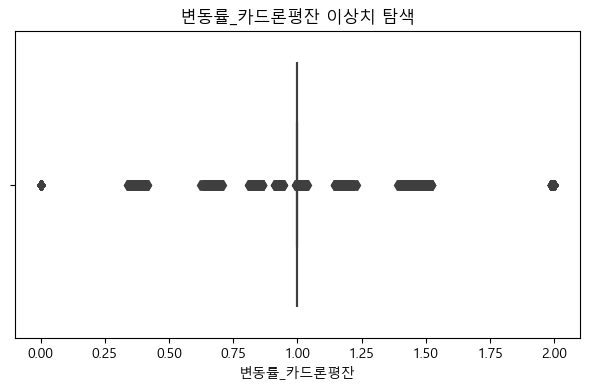

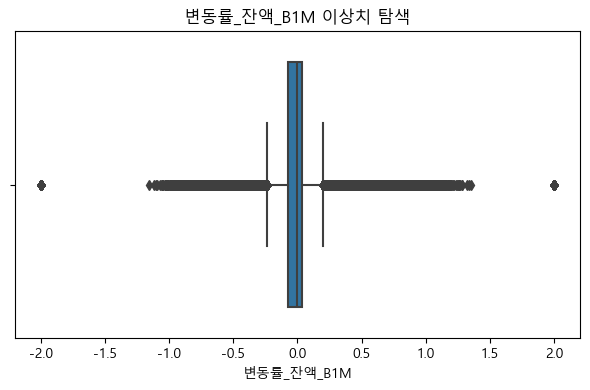

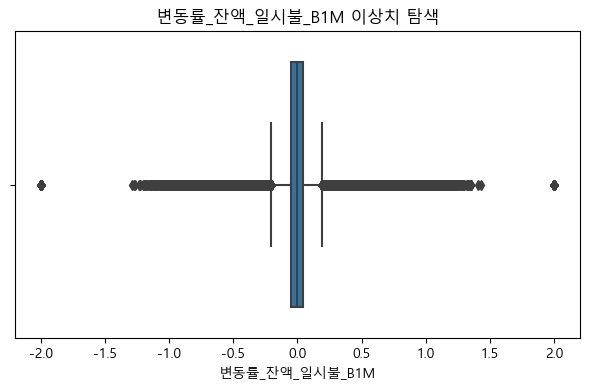

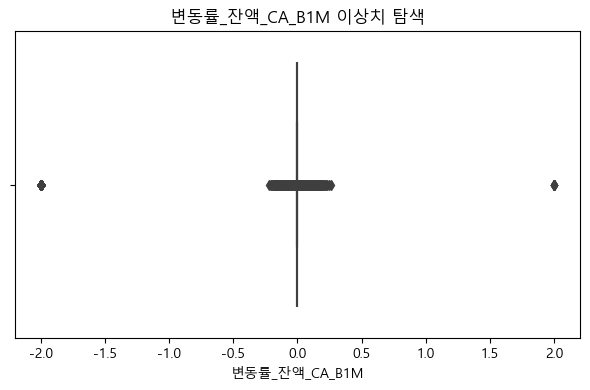

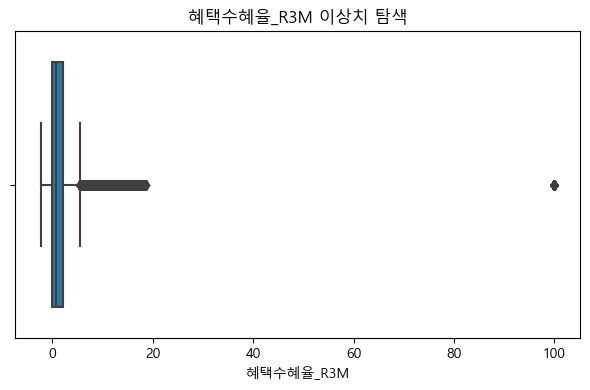

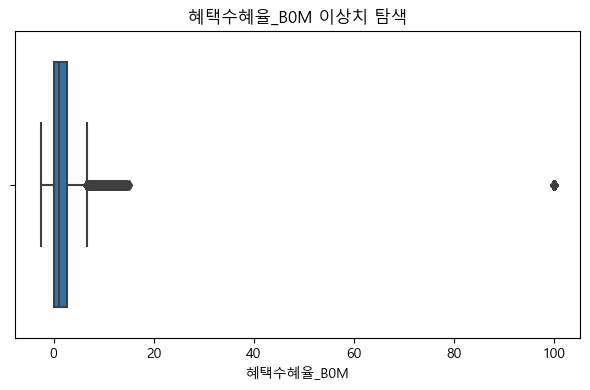

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 🔹 1. 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 🔹 2. 파일 경로 리스트 생성
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/8.성과정보"
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_성과정보.parquet") for month in months]

# 🔹 3. 데이터 병합
df_list = []
for path in file_paths:
    temp = pd.read_parquet(path)
    temp['기준년월'] = os.path.basename(path).split('_')[0]
    df_list.append(temp)

df = pd.concat(df_list, ignore_index=True)

# 🔹 4. 기본 정보 확인
print("📌 데이터 크기:", df.shape)
print("\n📌 데이터 타입 및 결측치:")
print(df.info())
print("\n📌 기초 통계량:")
print(df.describe(include='all'))

# 🔹 5. 결측치 비율 확인
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("\n📌 결측치 비율 높은 순:")
print(missing_ratio[missing_ratio > 0])

# 🔹 6. 수치형 변수 시각화 (히스토그램)
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=50)
    plt.title(f"{col} 분포")
    plt.xlabel(col)
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

# 🔹 7. 상관관계 분석
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("수치형 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

# 🔹 8. 이상치 탐색 (Boxplot 예시)
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} 이상치 탐색")
    plt.tight_layout()
    plt.show()

In [4]:
import pandas as pd
import os

# 🔹 1. 기본 설정
credit_base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/8.성과정보"
member_base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"
months = ['07', '08', '09', '10', '11', '12']

# 🔹 2. 병합용 데이터 저장 리스트
merged_list = []

for month in months:
    ym = f"2018{month}"

    # 신용정보 파일
    credit_path = os.path.join(credit_base_path, f"{ym}_train_성과정보.parquet")
    credit_df = pd.read_parquet(credit_path)
    credit_df["기준년월"] = ym

    # 회원정보 파일
    member_path = os.path.join(member_base_path, f"{ym}_train_회원정보.parquet")
    member_df = pd.read_parquet(member_path)
    member_df = member_df[["ID", "기준년월", "Segment"]].copy()
    member_df["기준년월"] = ym

    # 병합
    merged = pd.merge(credit_df, member_df, on=["ID", "기준년월"], how="left")
    merged_list.append(merged)

# 🔹 3. 전체 병합
final_df = pd.concat(merged_list, ignore_index=True)

# 🔹 4. 확인
print("✅ 병합 완료 | 데이터 크기:", final_df.shape)
print(final_df[['ID', '기준년월', 'Segment']].head())
print(final_df['Segment'].value_counts(dropna=False))

✅ 병합 완료 | 데이터 크기: (2400000, 50)
             ID    기준년월 Segment
0  TRAIN_000000  201807       D
1  TRAIN_000001  201807       E
2  TRAIN_000002  201807       C
3  TRAIN_000003  201807       D
4  TRAIN_000004  201807       E
Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# 🔹 경로 설정
credit_base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/8.성과정보"
member_base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"
months = ['07', '08', '09', '10', '11', '12']

# 🔹 데이터 병합
merged_list = []

for month in months:
    ym = f"2018{month}"

    credit_path = os.path.join(credit_base_path, f"{ym}_train_성과정보.parquet")
    credit_df = pd.read_parquet(credit_path)
    credit_df["기준년월"] = ym

    member_path = os.path.join(member_base_path, f"{ym}_train_회원정보.parquet")
    member_df = pd.read_parquet(member_path)
    member_df = member_df[["ID", "기준년월", "Segment"]].copy()
    member_df["기준년월"] = ym

    merged = pd.merge(credit_df, member_df, on=["ID", "기준년월"], how="left")
    merged_list.append(merged)

# 🔹 최종 병합 DataFrame
final_df = pd.concat(merged_list, ignore_index=True)

# 🔹 수치형 변수만 추출 (Segment 제외)
numeric_cols = final_df.select_dtypes(include='number').columns.drop('Segment', errors='ignore')

# 🔹 Segment별 평균 계산
group_summary = final_df.groupby('Segment')[numeric_cols].mean(numeric_only=True)

# 🔹 시각화: Jupyter에 보기 좋게 출력 (선택사항)
from IPython.display import display

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

display(group_summary.style
        .background_gradient(cmap='YlGnBu')
        .set_caption("📊 Segment별 수치형 변수 평균값 요약")
        .format(precision=2))

# 🔹 이미지 파일로 저장
fig, ax = plt.subplots(figsize=(len(group_summary.columns) * 0.6 + 2, len(group_summary) * 0.6 + 1))
ax.axis('off')

table = ax.table(cellText=group_summary.round(2).values,
                 colLabels=group_summary.columns,
                 rowLabels=group_summary.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)  # ✅ 오타 수정됨
table.scale(1.2, 1.2)

plt.title("📊 Segment별 수치형 변수 평균값 요약", fontsize=14, pad=20)
plt.savefig("성과_segment_summary_table.png", dpi=300, bbox_inches='tight')
plt.close()

print("✅ 테이블 이미지 저장 완료: 마케팅_segment_summary_table.png")

,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,증감율_이용금액_카드론_전월,증감율_이용건수_신용_분기,증감율_이용건수_신판_분기,증감율_이용건수_일시불_분기,증감율_이용건수_할부_분기,증감율_이용건수_CA_분기,증감율_이용건수_체크_분기,증감율_이용건수_카드론_분기,증감율_이용금액_신용_분기,증감율_이용금액_신판_분기,증감율_이용금액_일시불_분기,증감율_이용금액_할부_분기,증감율_이용금액_CA_분기,증감율_이용금액_체크_분기,증감율_이용금액_카드론_분기,잔액_신판평균한도소진율_r6m,잔액_신판최대한도소진율_r6m,잔액_신판평균한도소진율_r3m,잔액_신판최대한도소진율_r3m,잔액_신판ca평균한도소진율_r6m,잔액_신판ca최대한도소진율_r6m,잔액_신판ca평균한도소진율_r3m,잔액_신판ca최대한도소진율_r3m,변동률_일시불평잔,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,-0.02,-0.02,-0.01,-0.36,-0.05,-0.01,-0.01,0.07,0.17,0.17,-0.09,-0.02,-0.01,-0.01,-0.05,-0.06,-0.05,-0.23,0.03,-0.03,-0.05,-0.24,-0.25,-0.18,-0.20,-0.03,-0.03,-0.05,0.22,0.34,0.21,0.27,0.36,0.51,0.36,0.43,0.93,1.00,0.92,0.98,1.00,0.99,-0.05,-0.01,-0.01,1.28,1.36
B,-0.03,-0.03,-0.01,-0.48,0.00,-0.05,0.00,0.08,0.24,0.25,-0.10,-0.00,-0.04,0.00,-0.07,-0.06,-0.06,-0.04,0.02,0.12,0.00,-0.28,-0.24,-0.16,-0.12,-0.02,0.11,0.00,0.34,0.48,0.34,0.41,0.57,0.74,0.56,0.67,0.94,1.01,0.96,0.99,1.00,0.92,-0.01,0.04,-0.01,1.26,1.35
C,-0.02,-0.02,-0.01,-0.19,-0.05,-0.03,-0.00,0.12,0.17,0.17,-0.06,-0.01,-0.02,-0.00,-0.06,-0.06,-0.06,-0.23,-0.03,-0.03,-0.05,-0.14,-0.14,-0.10,-0.17,-0.05,-0.03,-0.05,0.22,0.31,0.21,0.26,0.31,0.43,0.30,0.37,0.95,1.00,0.90,0.96,1.00,0.98,-0.01,0.01,-0.01,1.30,1.58
D,-0.02,-0.02,-0.02,-0.17,-0.03,-0.03,-0.00,0.13,0.16,0.16,-0.07,-0.01,-0.01,-0.00,-0.08,-0.08,-0.07,-0.26,-0.04,-0.03,-0.04,-0.16,-0.15,-0.12,-0.19,-0.04,-0.03,-0.05,0.21,0.30,0.20,0.25,0.26,0.36,0.25,0.30,0.94,1.00,0.89,0.96,1.00,0.98,-0.01,0.00,-0.00,1.56,1.95
E,-0.03,-0.02,-0.02,-0.07,-0.01,-0.02,-0.00,0.06,0.07,0.07,-0.04,-0.01,-0.01,-0.00,-0.07,-0.07,-0.06,-0.17,-0.02,-0.02,-0.03,-0.13,-0.13,-0.10,-0.13,-0.01,-0.02,-0.03,0.12,0.17,0.11,0.14,0.13,0.19,0.12,0.15,0.89,0.94,0.87,0.92,0.94,0.93,-0.01,0.00,-0.00,5.79,6.72


C:\Users\HR\AppData\Local\Temp\ipykernel_12784\2107870611.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.savefig("성과_segment_summary_table.png", dpi=300, bbox_inches='tight')


✅ 테이블 이미지 저장 완료: 마케팅_segment_summary_table.png


In [6]:
print("Segment 분포:")
print(final_df['Segment'].value_counts())

Segment 분포:
Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


| Segment | 고객 수      | 비중 (대략)  |
| ------- | --------- | -------- |
| E       | 1,922,052 | 약 85% 이상 |
| D       | 349,242   | 약 15%    |
| C       | 127,590   | 소수       |
| A       | 972       | 극소수      |
| B       | 144       | 극소수      |


| 주요 변수    | A      | B    | C    | D    | E    | 인사이트 요약                |
| -------- | ------ | ---- | ---- | ---- | ---- | ---------------------- |
| 카드등록률    | 0.99   | 0.98 | 0.96 | 0.94 | 0.93 | A, B, C 높음 → 카드 보유 활성화 |
| RV신청률    | 1.0    | 1.0  | 0.98 | 0.90 | 0.89 | A\~C 그룹 매우 높음          |
| 실적총합\_평균 | 약 1.35 | 1.26 | 1.00 | 0.72 | 0.62 | A, B, C에서 성과 월등히 높음    |
| 추가대외수익지표 | 약 6.7  | 5.7  | 1.5  | 0.2  | 0.0  | A, B는 매우 높은 대외 수익 성과   |


In [9]:
# Segment별 결측 비율 계산 함수
def segmentwise_missing_ratio(df, group_col='Segment'):
    result = (
        df.groupby(group_col)
        .apply(lambda g: g.isnull().mean())
        .T  # 변수 기준으로 보기 좋게 전치
    )
    return result

# 실행
missing_by_segment = segmentwise_missing_ratio(final_df)

# 시각적으로 보기 좋게 표시
from IPython.display import display

display(missing_by_segment.style
        .format("{:.2%}")
        .background_gradient(cmap="Oranges")
        .set_caption("📌 Segment별 결측치 비율"))

C:\Users\HR\AppData\Local\Temp\ipykernel_12784\336228968.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.isnull().mean())


Segment,A,B,C,D,E
기준년월,0.00%,0.00%,0.00%,0.00%,0.00%
ID,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_신용_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_신판_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_일시불_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_할부_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_CA_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_체크_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용건수_카드론_전월,0.00%,0.00%,0.00%,0.00%,0.00%
증감율_이용금액_신용_전월,0.00%,0.00%,0.00%,0.00%,0.00%


In [10]:
# 전체 결측 비율
missing_ratio_total = final_df.isnull().mean()

# 30% 이상 결측 컬럼 목록
high_missing_cols = missing_ratio_total[missing_ratio_total >= 0.3].index.tolist()

print(f"❌ 제거할 컬럼 수: {len(high_missing_cols)}")
print(high_missing_cols)

# 제거
df_cleaned = final_df.drop(columns=high_missing_cols)

❌ 제거할 컬럼 수: 0
[]


In [11]:
# 수치형 변수 재정의
numeric_cols = df_cleaned.select_dtypes(include='number').columns.drop('Segment', errors='ignore')

# Segment별 평균값 요약
group_summary = df_cleaned.groupby('Segment')[numeric_cols].mean(numeric_only=True)

from IPython.display import display
display(group_summary.style
        .background_gradient(cmap='YlGnBu')
        .set_caption("📊 결측 제거 후 Segment별 평균값 요약")
        .format(precision=2))


,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,증감율_이용금액_카드론_전월,증감율_이용건수_신용_분기,증감율_이용건수_신판_분기,증감율_이용건수_일시불_분기,증감율_이용건수_할부_분기,증감율_이용건수_CA_분기,증감율_이용건수_체크_분기,증감율_이용건수_카드론_분기,증감율_이용금액_신용_분기,증감율_이용금액_신판_분기,증감율_이용금액_일시불_분기,증감율_이용금액_할부_분기,증감율_이용금액_CA_분기,증감율_이용금액_체크_분기,증감율_이용금액_카드론_분기,잔액_신판평균한도소진율_r6m,잔액_신판최대한도소진율_r6m,잔액_신판평균한도소진율_r3m,잔액_신판최대한도소진율_r3m,잔액_신판ca평균한도소진율_r6m,잔액_신판ca최대한도소진율_r6m,잔액_신판ca평균한도소진율_r3m,잔액_신판ca최대한도소진율_r3m,변동률_일시불평잔,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,-0.02,-0.02,-0.01,-0.36,-0.05,-0.01,-0.01,0.07,0.17,0.17,-0.09,-0.02,-0.01,-0.01,-0.05,-0.06,-0.05,-0.23,0.03,-0.03,-0.05,-0.24,-0.25,-0.18,-0.20,-0.03,-0.03,-0.05,0.22,0.34,0.21,0.27,0.36,0.51,0.36,0.43,0.93,1.00,0.92,0.98,1.00,0.99,-0.05,-0.01,-0.01,1.28,1.36
B,-0.03,-0.03,-0.01,-0.48,0.00,-0.05,0.00,0.08,0.24,0.25,-0.10,-0.00,-0.04,0.00,-0.07,-0.06,-0.06,-0.04,0.02,0.12,0.00,-0.28,-0.24,-0.16,-0.12,-0.02,0.11,0.00,0.34,0.48,0.34,0.41,0.57,0.74,0.56,0.67,0.94,1.01,0.96,0.99,1.00,0.92,-0.01,0.04,-0.01,1.26,1.35
C,-0.02,-0.02,-0.01,-0.19,-0.05,-0.03,-0.00,0.12,0.17,0.17,-0.06,-0.01,-0.02,-0.00,-0.06,-0.06,-0.06,-0.23,-0.03,-0.03,-0.05,-0.14,-0.14,-0.10,-0.17,-0.05,-0.03,-0.05,0.22,0.31,0.21,0.26,0.31,0.43,0.30,0.37,0.95,1.00,0.90,0.96,1.00,0.98,-0.01,0.01,-0.01,1.30,1.58
D,-0.02,-0.02,-0.02,-0.17,-0.03,-0.03,-0.00,0.13,0.16,0.16,-0.07,-0.01,-0.01,-0.00,-0.08,-0.08,-0.07,-0.26,-0.04,-0.03,-0.04,-0.16,-0.15,-0.12,-0.19,-0.04,-0.03,-0.05,0.21,0.30,0.20,0.25,0.26,0.36,0.25,0.30,0.94,1.00,0.89,0.96,1.00,0.98,-0.01,0.00,-0.00,1.56,1.95
E,-0.03,-0.02,-0.02,-0.07,-0.01,-0.02,-0.00,0.06,0.07,0.07,-0.04,-0.01,-0.01,-0.00,-0.07,-0.07,-0.06,-0.17,-0.02,-0.02,-0.03,-0.13,-0.13,-0.10,-0.13,-0.01,-0.02,-0.03,0.12,0.17,0.11,0.14,0.13,0.19,0.12,0.15,0.89,0.94,0.87,0.92,0.94,0.93,-0.01,0.00,-0.00,5.79,6.72


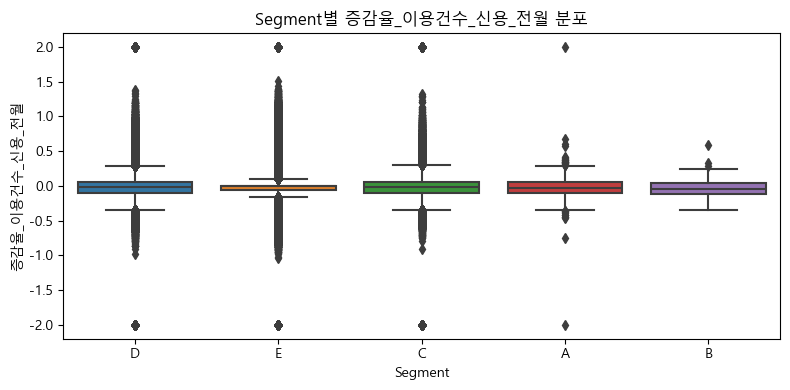

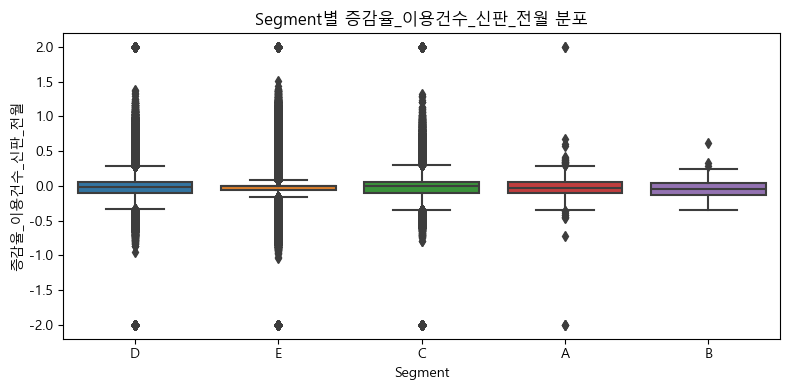

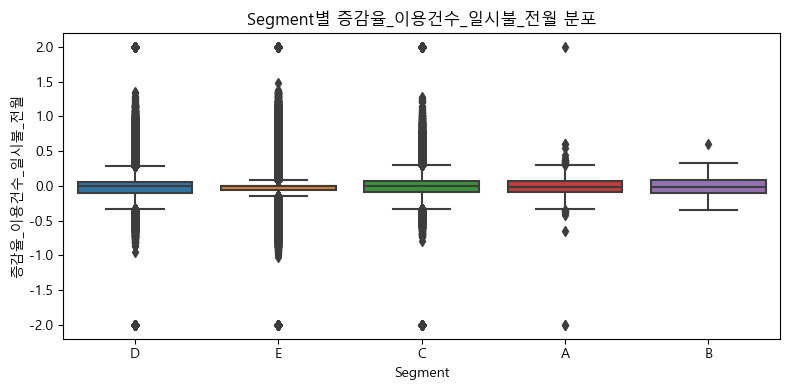

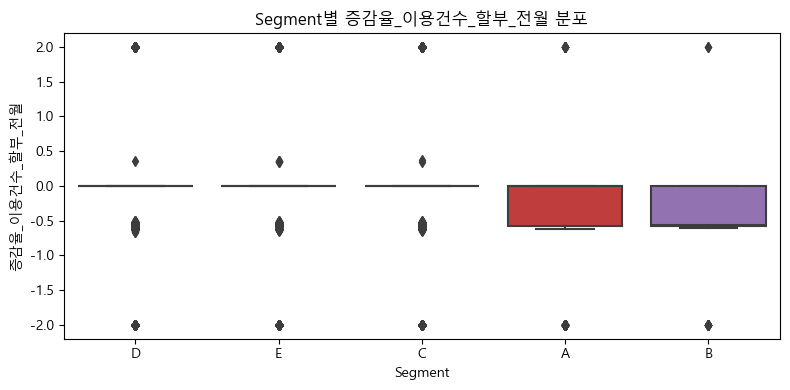

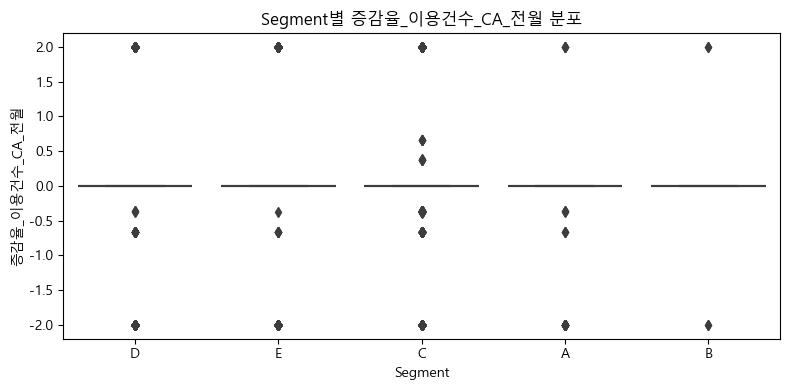

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: 상위 3~5개 변수만 골라 시각화
selected_cols = numeric_cols[:5]

for col in selected_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Segment', y=col, data=df_cleaned)
    plt.title(f'Segment별 {col} 분포')
    plt.tight_layout()
    plt.show()

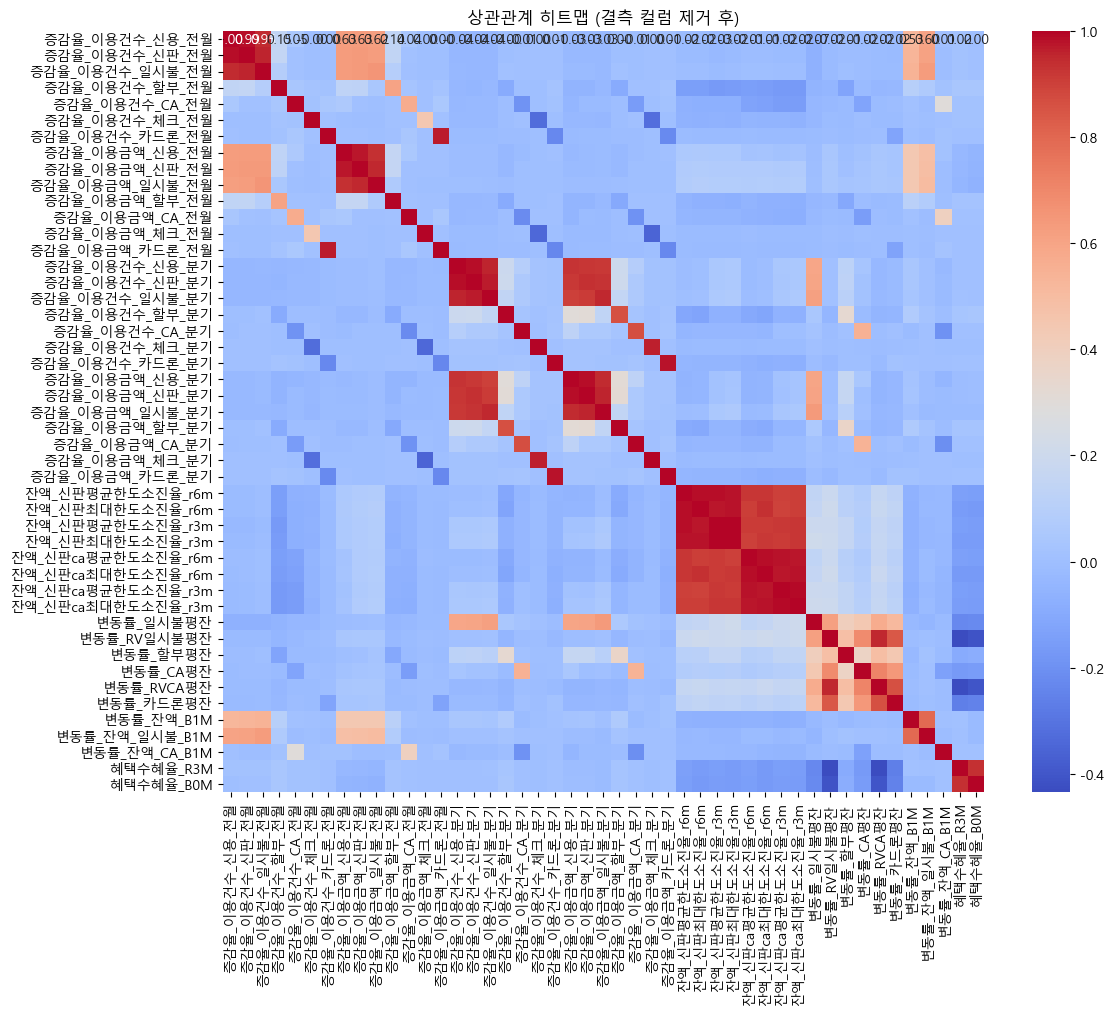

In [13]:
import seaborn as sns

corr = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("상관관계 히트맵 (결측 컬럼 제거 후)")
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import os

# 1. 회원정보 파일 경로 리스트
member_file_paths = [
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201807_train_회원정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201808_train_회원정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201809_train_회원정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201810_train_회원정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201811_train_회원정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보/201812_train_회원정보.parquet"
]

# 2. 마케팅정보 파일 경로 리스트
marketing_file_paths = [
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201807_train_신용정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201808_train_신용정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201809_train_신용정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201810_train_신용정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201811_train_신용정보.parquet",
    "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/2.신용정보/201812_train_신용정보.parquet"
]

# 3. 기준년월 컬럼 추가 및 병합 함수
def load_and_merge_parquet(file_paths):
    df_list = []
    for path in file_paths:
        df = pd.read_parquet(path)
        기준년월 = os.path.basename(path).split('_')[0]
        df['기준년월'] = 기준년월
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# 4. 데이터 로딩
member_df = load_and_merge_parquet(member_file_paths)
marketing_df = load_and_merge_parquet(marketing_file_paths)

# 5. Segment 컬럼 자동 탐색 및 숫자형 변환
segment_col_candidates = [col for col in member_df.columns if 'segment' in col.lower()]
print("사용 가능한 segment 컬럼 후보:", segment_col_candidates)
segment_col = segment_col_candidates[-1]

if member_df[segment_col].dtype == 'object':
    member_df[segment_col] = member_df[segment_col].astype('category').cat.codes

# 6. 두 DataFrame을 'ID'와 '기준년월' 기준으로 inner join (병합 아님, 동기화)
target_cols = ['ID', '기준년월', segment_col]
member_target = member_df[target_cols]
combined_df = pd.merge(member_target, marketing_df, on=['ID', '기준년월'], how='inner')

# 7. 분석 대상 numeric 컬럼만 선택
numeric_cols = [col for col in combined_df.select_dtypes(include=['int64', 'float64']).columns if col != segment_col]

# 8. 결측치 제거 및 std=0 컬럼 제거
clean_df = combined_df[numeric_cols + [segment_col]].dropna()
clean_df = clean_df.loc[:, clean_df.std() != 0]
numeric_cols = [col for col in numeric_cols if col in clean_df.columns]

# 9. 결측치 수 계산
missing_dict = {
    col: combined_df[col].isnull().sum()
    for col in numeric_cols
}

# 10. 이상치 수 계산 (IQR 기준)
outlier_dict = {}
for col in numeric_cols:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((combined_df[col] < lower_bound) | (combined_df[col] > upper_bound)).sum()
    outlier_dict[col] = outliers

# 11. 상관계수 계산
corr_dict = {
    col: clean_df[segment_col].corr(clean_df[col])
    for col in numeric_cols
}

# 12. 결과 정리
corr_df = pd.DataFrame({
    '컬럼명': list(corr_dict.keys()),
    '상관계수': list(corr_dict.values()),
    '결측치 수': [missing_dict[col] for col in corr_dict.keys()],
    '이상치 수': [outlier_dict[col] for col in corr_dict.keys()]
})

corr_df = corr_df.sort_values(by='상관계수', key=abs, ascending=False)

# 13. 스타일링 출력
from IPython.display import display
styled = corr_df.style.background_gradient(cmap='coolwarm', subset=['상관계수']) \
                    .set_properties(**{'text-align': 'center'}) \
                    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
display(styled)


사용 가능한 segment 컬럼 후보: ['Segment']


,컬럼명,상관계수,결측치 수,이상치 수
1,카드이용한도금액,-0.284751,0,155531
24,카드이용한도금액_B2M,-0.282935,0,158297
23,카드이용한도금액_B1M,-0.282312,0,157572
2,CA한도금액,-0.280853,0,55136
5,CA이자율_할인전,-0.106931,0,544496
0,최초한도금액,-0.088260,0,328716
10,RV약정청구율,0.079446,0,454949
7,RV일시불이자율_할인전,-0.074411,0,269448
8,RV현금서비스이자율_할인전,-0.071617,0,452238
9,RV신청일자,0.057772,1951236,0


In [15]:
corr_filtered = corr_df[abs(corr_df['상관계수']) >= 0.3]
print("선별된 변수 수:", len(corr_filtered))
display(corr_filtered)

선별된 변수 수: 0


,컬럼명,상관계수,결측치 수,이상치 수
